# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Dataframe

## Path Creation

In [6]:
path = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged'

In [7]:
path

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged'

## Import dataframe

In [9]:
#Importing orders_products_merge3.pkl as df_o_p_m
df_o_p_m = pd.read_pickle(os.path.join(path, 'orders_products_merge3.pkl'))

In [10]:
#Checking output
df_o_p_m.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_price,Spender_habit,median_days_no_order,Customer Type
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy days,Most Orders,32,Regular Customer,6.936029,Low Spender,8.0,Frequent Customer
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy days,Average Orders,32,Regular Customer,6.936029,Low Spender,8.0,Frequent Customer
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average Orders,5,New Customer,7.930211,Low Spender,6.0,Frequent Customer
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,...,Mid-range product,Regularly busy,Least busy days,Most Orders,3,New Customer,4.972421,Low Spender,9.0,Frequent Customer
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,...,Mid-range product,Least busy,Least busy days,Average Orders,3,New Customer,4.972421,Low Spender,9.0,Frequent Customer


# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

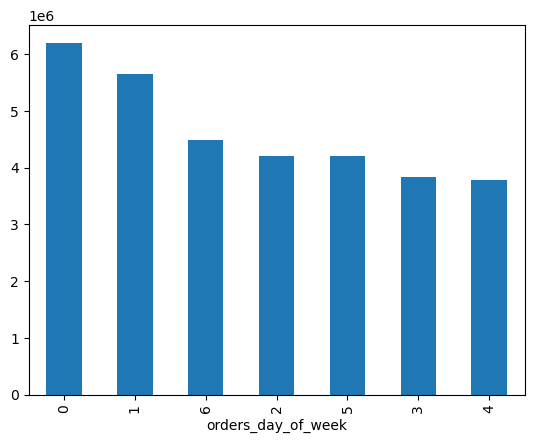

In [12]:
# plot a bar graph for the count of the orders_day_of_week column in df_o_p_m (order highest to lowest)
df_o_p_m['orders_day_of_week'].value_counts().plot.bar()

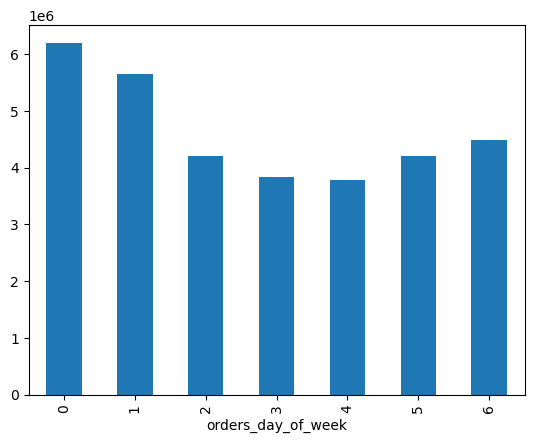

In [13]:
# plot a bar graph for the countt of the orders_day_of_week column in df_o_p_m (in order of the index)
bar = df_o_p_m['orders_day_of_week'].value_counts().sort_index().plot.bar()

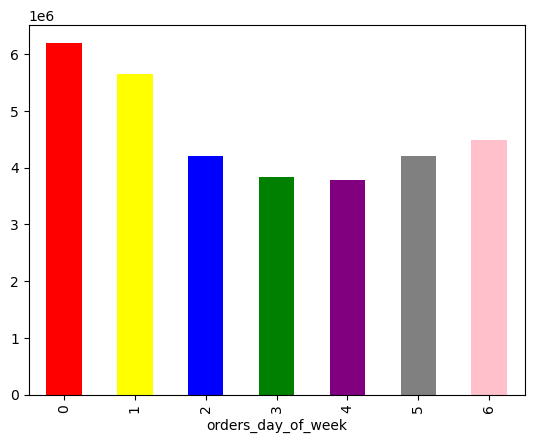

In [14]:
#adding colour
bar = df_o_p_m['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','yellow','blue','green','purple','grey','pink'])

## Exporting Charts

In [16]:
#Create path for visualizations
path2 = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

In [17]:
path2

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

In [18]:
#Export bar.figure 
bar.figure.savefig(os.path.join(path2, 'bar_orders_dow.png'))

# Creating Histograms

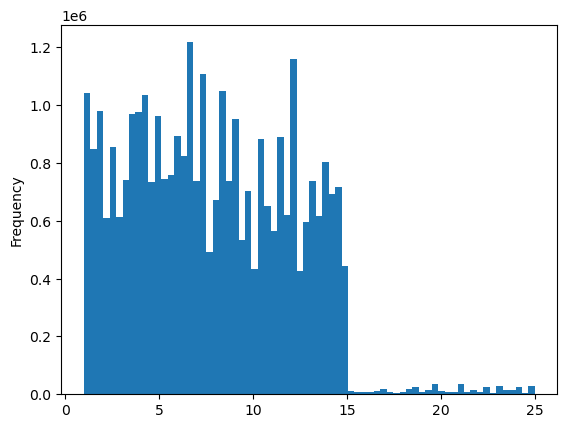

In [37]:
#in df_o_p_m plot a histogram of the prices column with 70 bins
hist = df_o_p_m['prices'].plot.hist(bins = 70)

In [38]:
#Removing outliers that are skewing data and replacing them with N
df_o_p_m.loc[df_o_p_m['prices'] >100, 'prices'] = np.nan

In [45]:
#check output
df_o_p_m['prices'].max()

25.0

In [41]:
#Export Histogram
hist.figure.savefig(os.path.join(path2, 'prices_histogram.png'))

# SAMPLING DATA

## Step by Step Guide
    
    1.Set the seed for the random number generator.
   
    2.Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1
    
    3.Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7)

    4.Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [47]:
#Creating Sample of df_o_p_m 
np.random.seed(4)
dev = np.random.rand(len(df_o_p_m)) <= 0.7

    You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples?

    big = ords_prods_merge[dev]
    small = ords_prods_merge[~dev]

    The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. You’ll do this according to the values in your dev list. For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

In [49]:
# Store 70% of sample in dataframe big
big = df_o_p_m[dev]

In [50]:
# Store 30% of sample in dataframe small
small = df_o_p_m[~dev]

    The first step, then, is to create some random samples. A sample, as you learned back in Achievement 1, is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. You can then create charts from these samples the same as you would any other subset, the only difference being that you know these subsets accurately represent the entire dataframe as a whole.

In [53]:
#checking big and small dfs together are the same size as df_o_p_m
len(df_o_p_m)

32404859

In [55]:
len(big) + len(small)

32404859

In [57]:
# create dataframe df_2 that contains the orders_dow and prices columns from small
df_2 = small[['orders_day_of_week','prices']]

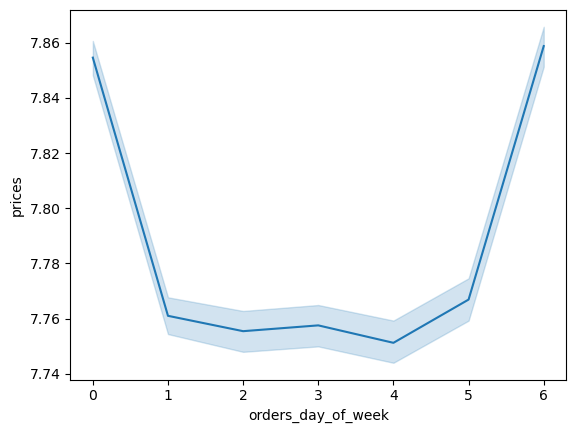

In [59]:
# create line graph from df_2 with x axis = orders dow and y axis = prices
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [61]:
line.figure.savefig(os.path.join(path2, 'order_dow by prices line graph.png'))